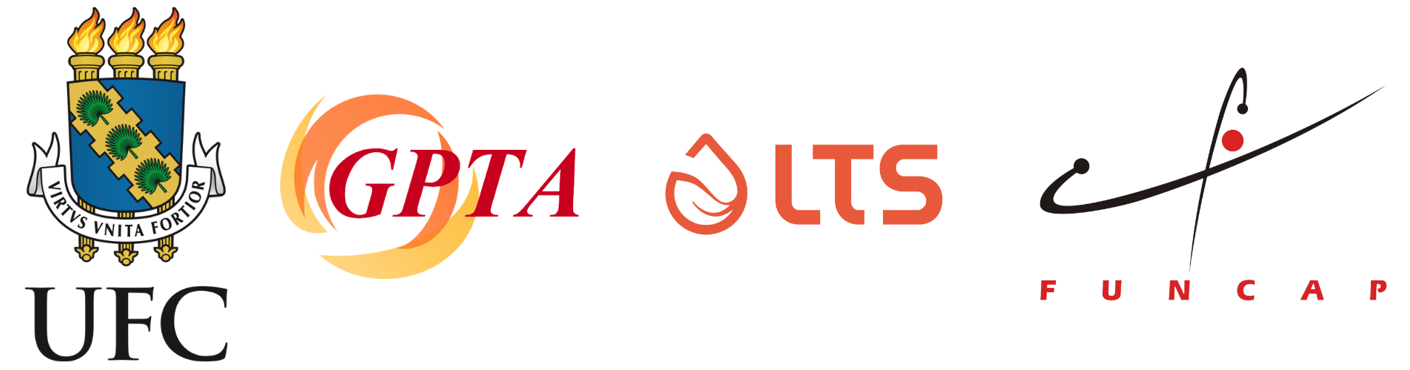

# ENCONTROS UNIVERSITÁRIOS - 2025

Esse notebook python foi desenvolvido com o objetivo de executar a otimização da arquitetura de uma MLP (Multilayer Perceptron), de uma camada oculta, para a predição da densidade de solventes eutéticos profundos (DES) através de parâmetros críticos.


Desenvolvido pelo bolsista Francisco Hiago Barbosa Quinto no Laboratório de Termodinâmica e processos de Separação (LTS), Da Universidade Federal do Ceará, sob orientação da prof(a) dra. Rilvia Saraiva de Santiago-Aguiar no ano de 2025. Esse trabalho só foi possível graças ao apoio da FUNCAP (Fundação Cearense de Apoio ao Desenvolvimento Científico e Tecnológico).



# **Introdução**

Esse trabalho tomou como base o estudo realizado *Abdollahzadeh, M., et al.(2022)*, onde foi fornecido um banco de dados com mais de 1.200 valores experimentais de densidade de diversos solventes eutéticos profundos e 7 modelos de machine learning foram empregadas para a predição da densidade através de parâmetros críticos, que foram comparados com correlações empiricas existentes.

Dada a curva de aprendizado suave e comunidade ativa, o Python vem destacando-se na área do aprendizado de máquina, possuindo alguns FrameWorks específicos para essa área, o que facilita a implementação dos algoritmo, bastando para isso, saber a configuração de determinado modelo, que apresenta diversas variáveis de modificação e formas de implementação. 

De forma a possibilitar a definição da melhor configuração de uma MLP desenvolvida em Python para a predição da densidade de DES, esse trabalho utilizou o TensorFlow como FrameWork base para o desenvolvimento das redes neurais, e comparou-se as métricas com aquelas do artigo base.

**Metodologia**

De forma conseguir comparar os resultados com aqueles obtidos por *Abdollahzadeh, M., et al.(2022)*, esse trabalho limitou-se a redes neurais com somente uma camada oculta, usando as mesmas features e base de dados (1239 medidas). Dessa forma a densidade dos DES será avaliada como uma função de 4 características: Temperatura, Temperatura Crítica, Pressão Crítica e Fator Acêntrico.


$ \Large
\rho_{DES} ~=~ f(T,~ T_C,~ P_C,~ \omega)
$

Foram avaliados mais de 500 configurações possíveis para a arquitetura da rede, usando para 4 etapas principais:


# **Pré-processamento dos dados**

## Bibliotecas Utilizadas

In [1]:
import pandas as pd

import matplotlib.pyplot as plt

import numpy as np

import seaborn as sns

import tensorflow as tf

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, root_mean_squared_error, r2_score

In [2]:
print(f"A versão do tensorflow usada é a {tf.__version__}")

A versão do tensorflow usada é a 2.19.0


## Importando o Dataframe de trabalho

In [3]:
#leitura do dataframe
df = pd.read_excel(r"Dados\densidade_experimental.xlsx")

df.head()

,HBA,HBD,HBA:HBD,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3)
0,Acetyl choline chloride,"1,2,4-triazole",1;1,303.15,682.86,38.48,0.4819,1129.3
1,Acetyl choline chloride,"1,2,4-triazole",1;1,313.15,682.86,38.48,0.4819,1124.9
2,Acetyl choline chloride,"1,2,4-triazole",1;1,323.15,682.86,38.48,0.4819,1119.3
3,Acetyl choline chloride,"1,2,4-triazole",1;1,333.15,682.86,38.48,0.4819,1113.3
4,Acetyl choline chloride,"1,2,4-triazole",1;1,343.15,682.86,38.48,0.4819,1108.1


In [4]:
df.describe()

,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3)
count,1239.000000,1239.000000,1239.000000,1239.000000,1239.000000
mean,323.330589,717.751994,33.098973,0.983050,1145.145359
std,20.084247,77.580452,8.750395,0.287316,88.511771
min,283.150000,588.750000,14.380000,0.415400,928.000000
25%,305.675000,664.900000,26.960000,0.830100,1089.650000
50%,323.150000,702.430000,33.459000,0.927800,1149.000000
75%,338.150000,774.010000,40.124000,1.231350,1217.150000
max,373.150000,1084.190000,52.851000,1.969600,1450.000000


In [5]:
df.nunique()

HBA                 17
HBD                 45
HBA:HBD             28
T(K)                26
Tc(K)              146
Pc(bar)            146
Fator Acentrico    144
Density(kg/m3)     903
dtype: int64

In [6]:
print(f"Quantidade de {df['HBA'].value_counts()}")



Quantidade de HBA
Choline chloride                                    439
Tetrabutylammonium chloride                         146
Acetyl choline chloride                             120
N,N diethylenethanol ammonium chloride              110
Methyl triphenylphosphonium bromide                 104
Allyl triphenylphosphonium bromide                   66
benzyldimethyl(2-hydroxyethyl) ammonium chloride     65
Benzyl tripropyl ammonium Chloride                   56
Betaine                                              32
Tetrahexylammonium bromide                           22
L-proline                                            22
Trimethylglicine                                     21
Diethylamine hydrochloride                           12
Tetraethylammonium chloride                          11
Tetraethylammonium bromide                           11
D-Glucose                                             1
Citric acid                                           1
Name: count, dtype: int64


In [7]:
pow(df[["T(K)", "Tc(K)", "Pc(bar)", "Fator Acentrico", "Density(kg/m3)"]].corr(),2)


,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3)
T(K),1.000000,0.000435,0.000461,0.009054,0.002167
Tc(K),0.000435,1.000000,0.498128,0.313243,0.150570
Pc(bar),0.000461,0.498128,1.000000,0.304377,0.011641
Fator Acentrico,0.009054,0.313243,0.304377,1.000000,0.196801
Density(kg/m3),0.002167,0.150570,0.011641,0.196801,1.000000


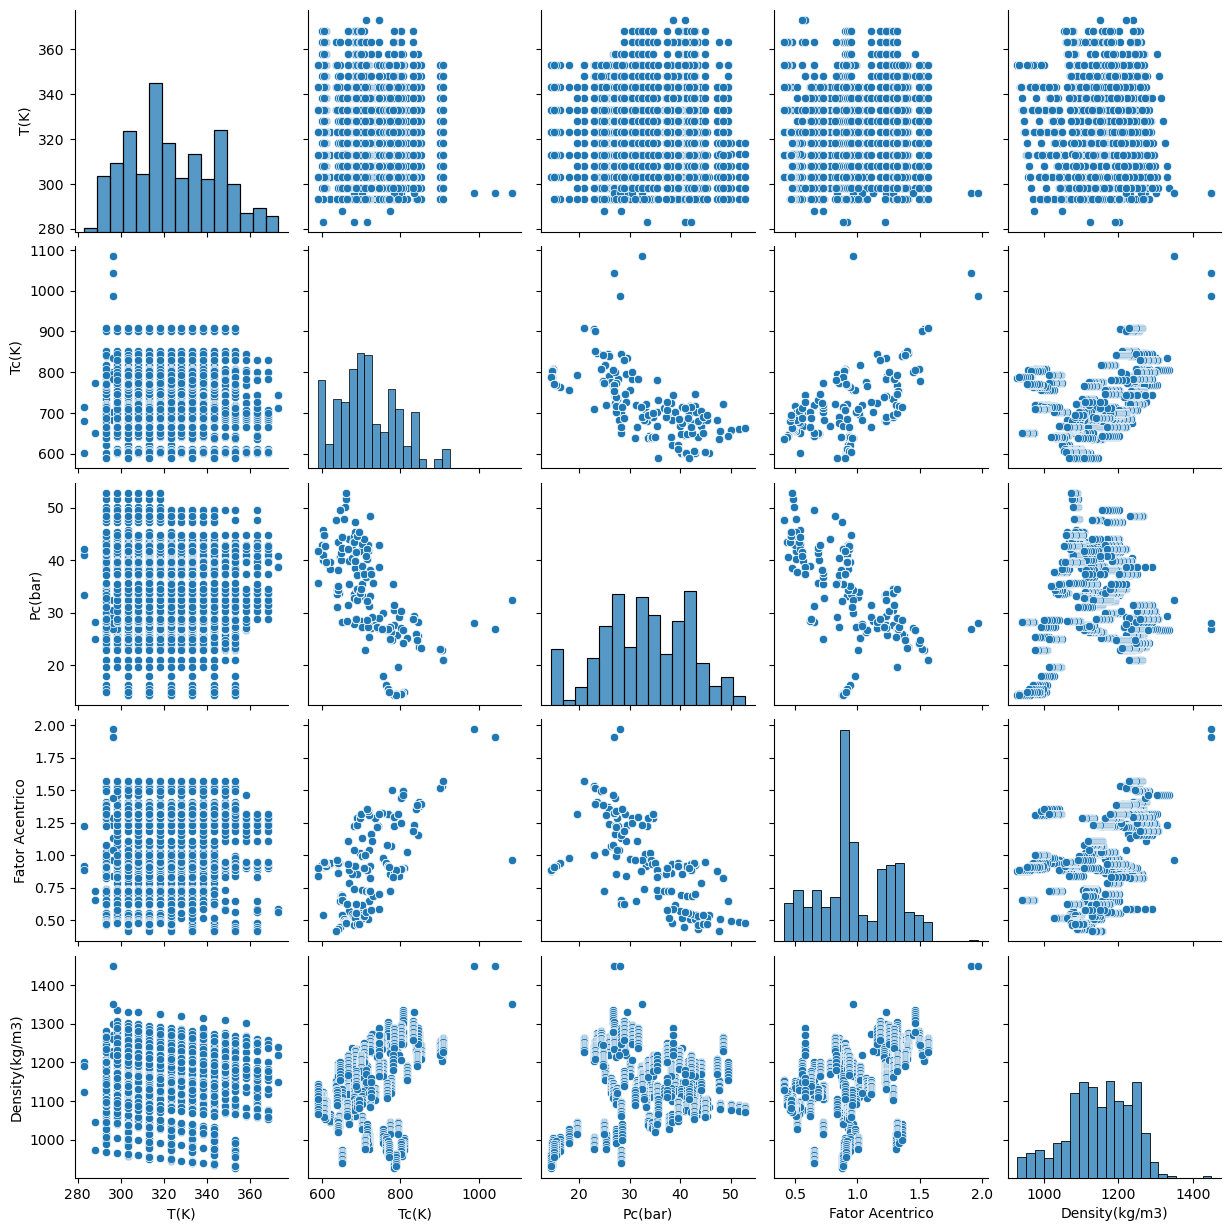

In [8]:
sns.pairplot(df[["T(K)", "Tc(K)", "Pc(bar)", "Fator Acentrico", "Density(kg/m3)"]])

## Separação dos Datasets

In [9]:
# separação das colunas
colunas = df.columns

# Lista de features
X = df[colunas[3:7]]

# Coluna com os valores de densidade
Y = df[colunas[7]]


X.head()

,T(K),Tc(K),Pc(bar),Fator Acentrico
0,303.15,682.86,38.48,0.4819
1,313.15,682.86,38.48,0.4819
2,323.15,682.86,38.48,0.4819
3,333.15,682.86,38.48,0.4819
4,343.15,682.86,38.48,0.4819


80% dos dados serão separados para treino e os 20% que restaram para teste. Dos 80% para treinamento, serão separados 50% (equivale a 40% do total) para ajuste dos hiperparâmetros

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size= 0.2, random_state= 64)

# Realizando a divisão
X_, X_busca, Y_, Y_busca = train_test_split(X_train, Y_train, test_size= 0.50, random_state= 64)

In [11]:
print(f"Da quantidade de exemplos em cada dataset: ")
print(f"Dataset reservado para o ajuste: {len(Y_busca)} medidas")
print(f"Dataset reservado para o treino: {len(Y_train)} medidas")
print(f"Dataset reservado para o teste: {len(Y_test)} medidas")

Da quantidade de exemplos em cada dataset: 
Dataset reservado para o ajuste: 496 medidas
Dataset reservado para o treino: 991 medidas
Dataset reservado para o teste: 248 medidas


## Normalização dos dados

In [12]:
# Pre-processamento, realizando a normalização dos dados
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()  # inicializa a classe
scalerY = StandardScaler()

# TREINAMENTO
X_train_scaled = scaler.fit_transform(X_train)
# Formatação para manter os indices e formas
X_train_scaled = pd.DataFrame(X_train_scaled, index= X_train.index, columns= X_train.columns)

# Medidas
y_mean = Y_train.mean()
y_std = Y_train.std()
y_max = Y_train.max()
y_min = Y_train.min()

Y_train_scaled = (Y_train - y_mean) / y_std

# TESTE
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, index= X_test.index, columns= X_test.columns)
Y_test_scaled =  (Y_test - y_mean) / y_std

# BUSCA
X_busca_scaled = scaler.transform(X_busca)
X_busca_scaled = pd.DataFrame(X_busca_scaled, index= X_busca.index, columns= X_busca.columns)

Y_busca_scaled =  (Y_busca - y_mean) / y_std



In [13]:
def Y_Retorno(y_predito, valor_mean = y_mean, valor_std = y_std):
    '''
    Retorna os valores da densidade para a escala normal, usando os parâmetros da média e desvio padrão
    '''
    valor = y_predito * valor_std + valor_mean

    return valor

In [14]:
X_busca_scaled

,T(K),Tc(K),Pc(bar),Fator Acentrico
3,0.480378,-0.464597,0.619793,-1.737800
460,2.218910,-1.522542,0.808691,-0.254733
630,0.480378,-0.482515,-0.022507,-0.850041
1137,-1.258154,-0.897393,-0.561510,-1.127574
113,0.480378,0.005483,-0.213473,-1.151511
...,...,...,...,...
590,0.728740,-0.383835,0.171677,1.043082
453,0.480378,-1.522542,0.808691,-0.254733
1179,-0.264707,-0.702799,-0.543011,-1.254546
769,-1.506516,-0.970777,1.890145,-1.151511


Text(0, 0.5, 'Densidade normalizada')

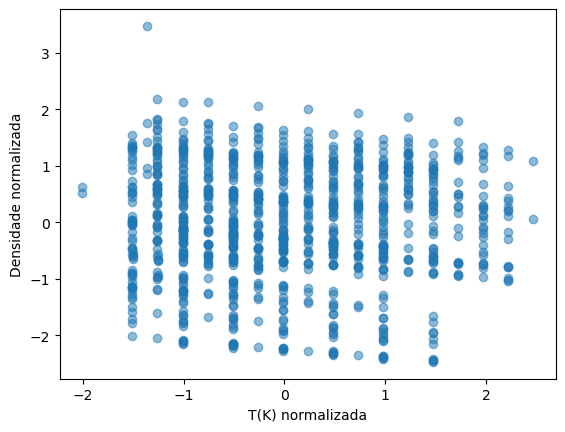

In [15]:
plt.scatter(X_train_scaled['T(K)'], Y_train_scaled, label = 'Treinamento', alpha= 0.5)

plt.xlabel("T(K) normalizada")
plt.ylabel("Densidade normalizada")

In [16]:
for indice in range(len(scaler.mean_)):
    print(f"Média e desvio padrão para {X.columns[indice]} = {scaler.mean_[indice]:.3f} e {scaler.scale_[indice]:.3f}")

Média e desvio padrão para T(K) = 323.479 e 20.132
Média e desvio padrão para Tc(K) = 718.124 e 75.902
Média e desvio padrão para Pc(bar) = 33.086 e 8.703
Média e desvio padrão para Fator Acentrico = 0.983 e 0.288


# **Otimizando os parâmetros da Rede neural**

Realizando o grid_search buscando o melhor modelo de rede neural de uma linha

## Construção e treinamento

In [17]:

def build_models(units, activation1, activation2, optimizador, perda, rate):
    """
    Função para criação do modelo de rede neural, retorna um objeto 
    
    ----parametros-----
    units
    activation
    optimizer
    """

    tf.random.set_seed(64)

    # Definindo a arquitetura 
    model = tf.keras.Sequential()

    # Layer Input
    model.add(tf.keras.layers.Input(shape = (4, ) ))

    # Layer oculta
    model.add(tf.keras.layers.Dense(units = units, activation = activation1))

    # Layer saida
    model.add(tf.keras.layers.Dense(units = 1, activation = activation2))

    # medidas MAPE, RMSE, MAE e R2
    metricas = ['root_mean_squared_error',
                'mean_absolute_error',
                'r2_score']

    # Definindo as métricas
    model.compile(
        optimizer = optimizador(learning_rate = rate),
        loss = perda,
        metrics = metricas
    )

    return model


In [19]:
from sklearn.model_selection import KFold


units = [5, 10, 11, 12, 13, 14, 15, 20]
rates = [1e-3]
batch_sizes = [16, 32]
optimizer = [tf.keras.optimizers.SGD, tf.keras.optimizers.Adam]
activation = ["relu", "gelu", "linear", "tanh"]
activation_saida = ['linear']
perda = ['mean_squared_error', 'huber', 'log_cosh']
qnt = 0

qnt_total = len(units) * len(rates) * len(optimizer) * len(activation) * len(activation_saida) * len(perda) * len(batch_sizes)

dados = []

for unit in units:
    for opt in optimizer:
        for activation1 in activation:
            for rate in rates:
                for activation2 in activation_saida:
                    for los in perda:
                        for batch in batch_sizes:

                            # Aqui o modelo já tem toda a configuração
                            
                            
                            ############ Criação dos k-folds para a validação cruzada ##########
                            k = 4
                            
                            kf = KFold(n_splits = k, shuffle = True, random_state = 42)

                            k_mae_ = []
                            k_mape_ = []
                            k_rmse_ = []
                            k_r2_ = []
                            k_loss = []

                            k_r2_comp = []
                            k_r2_calc_norm = [] #R2 calculado com os dados não normalizados

                            n_fold_ = 1

                            print(f"Criando e treinando o modelo {qnt+1} / {qnt_total}")

                            # indices de cada uma dos datasets usados
                            for ind_treino, ind_teste in kf.split(X_busca_scaled):

                                print(f"\t...treinando no k-fold {n_fold_} de {k}")
                                #Separação dos datasets pelos indices
                                # TREINO
                                treino_x_scaled = X_busca_scaled.iloc[list(ind_treino)]
                                treino_y_scaled = Y_busca_scaled.iloc[list(ind_treino)]

                                # TESTE
                                teste_x_scaled =  X_busca_scaled.iloc[list(ind_teste)]
                                teste_y_scaled = Y_busca_scaled.iloc[list(ind_teste)]
                                teste_y_normal = Y_busca.iloc[list(ind_teste)]

                                # Criando o modelo com as configurações
                                model = build_models(unit, activation1, activation2, opt, los, rate)

                                # Treinando o modelo
                                hist = model.fit(treino_x_scaled, treino_y_scaled, batch_size= batch, epochs = 150, verbose=0)

                                # Calculo da metrica neste fold
                                predito_y_scaled = model.predict(teste_x_scaled, verbose = 0)
                                
                                # Calculo das metricas
                                mae_ = mean_absolute_error(teste_y_normal, Y_Retorno(predito_y_scaled))
                                # O MAPE é diferente, para evitar o erro de numeros pequenos, precisa converter para a escala normal
                                mape_ = mean_absolute_percentage_error(teste_y_normal,  Y_Retorno(predito_y_scaled))
                                rmse_ = root_mean_squared_error(teste_y_normal, Y_Retorno(predito_y_scaled))
                                r2_ = r2_score(teste_y_scaled, predito_y_scaled)

                                # Adicionando nas variaveis
                                k_mae_.append(mae_)
                                k_mape_.append(mape_)
                                k_rmse_.append(rmse_)
                                k_r2_.append(r2_)
                                k_loss.append(hist.history['loss'][-1])

                                k_r2_comp.append(hist.history['r2_score'][-1])
                                k_r2_calc_norm.append(r2_score(teste_y_normal, Y_Retorno(predito_y_scaled)))

                                n_fold_ += 1


                            ########## FINAL DO LOOP DOS K-FOLDS ################

                            # Configuração do modelo
                            model_conf = {'N° modelo': qnt,
                                            'Units': unit,
                                            'Alfa' : rate, 
                                            'Otimizador': opt.__name__,
                                            'Funcao Perda': los,
                                            'Act 1':activation1,
                                            'Act 2': activation2,
                                            'Batch Size' : batch}
                            
                            # Cálculo e registro das métricas médias
                            dici = {'loss': k_loss,
                                    'MAE': np.mean(k_mae_),
                                    'R2': np.mean(k_r2_),
                                    'RMSE': np.mean(k_rmse_),
                                    'MAPE' : np.mean(k_mape_),
                                    'model' : model_conf
                                    }
                            
                            print(f"\t...R2 médio treino {np.mean(k_r2_comp):.3f} || R2 médio teste {np.mean(k_r2_):.3f} [{np.mean(k_r2_calc_norm):.3f}]")
                            print(f"\t...Loss dos k-folds {k_loss}\n")
                            
                            # Adição dos dados
                            dados.append(dici)
                            qnt += 1

Criando e treinando o modelo 1 / 384
	...treinando no k-fold 1 de 4
	...treinando no k-fold 2 de 4
	...treinando no k-fold 3 de 4
	...treinando no k-fold 4 de 4
	...R2 médio treino 0.663 || R2 médio teste 0.649 [0.649]
	...Loss dos k-folds [0.30560213327407837, 0.32071927189826965, 0.37814557552337646, 0.31861257553100586]

Criando e treinando o modelo 2 / 384
	...treinando no k-fold 1 de 4
	...treinando no k-fold 2 de 4
	...treinando no k-fold 3 de 4
	...treinando no k-fold 4 de 4
	...R2 médio treino 0.445 || R2 médio teste 0.425 [0.425]
	...Loss dos k-folds [0.34599927067756653, 0.6288542747497559, 0.7475124001502991, 0.47114092111587524]

Criando e treinando o modelo 3 / 384
	...treinando no k-fold 1 de 4
	...treinando no k-fold 2 de 4
	...treinando no k-fold 3 de 4
	...treinando no k-fold 4 de 4
	...R2 médio treino 0.310 || R2 médio teste 0.349 [0.349]
	...Loss dos k-folds [0.4012839198112488, 0.20597811043262482, 0.3034428656101227, 0.257538765668869]

Criando e treinando o modelo

In [20]:
# 436m 23s

nome_arq = f'\\dados_{qnt_total} modelos_kfold_4_EU4.txt'
arq = open(r"D:\Hiago B\UFC\2025\LTS\8. Encontros Universitários" + nome_arq, 'w')

arq.write(str(dados))

arq.close()

## Visualização da gridsearch

In [21]:
loss = []
MAE = []
R2 = []
RMSE = []
MAPE = []

n_model = []
batch = []
alfas = []
n_neuronios = []
perda = []
otimizadores = []


ativa1 = []
ativa2 = []

for dado in dados:
    loss.append(dado['loss'])
    R2.append(dado['R2'])
    RMSE.append(dado['RMSE'])
    MAE.append(dado['MAE'])
    MAPE.append(dado['MAPE'])


    n_model.append(dado['model']['N° modelo'])
    n_neuronios.append(dado['model']['Units'])
    alfas.append(dado['model']['Alfa'])
    batch.append(dado['model']['Batch Size'])
    

    if dado['model']['Funcao Perda'] == 'mean_squared_error':
        perda.append('mse')
    elif dado['model']['Funcao Perda'] == 'mean_squared_logarithmic_error':
        perda.append('msle')
    else:
        perda.append(dado['model']['Funcao Perda'])

    otimizadores.append(dado['model']['Otimizador'])

    ativa1.append(dado['model']['Act 1'])
    ativa2.append(dado['model']['Act 2'])

n_model =  np.array(n_model)
n_neuronios = np.array(n_neuronios)


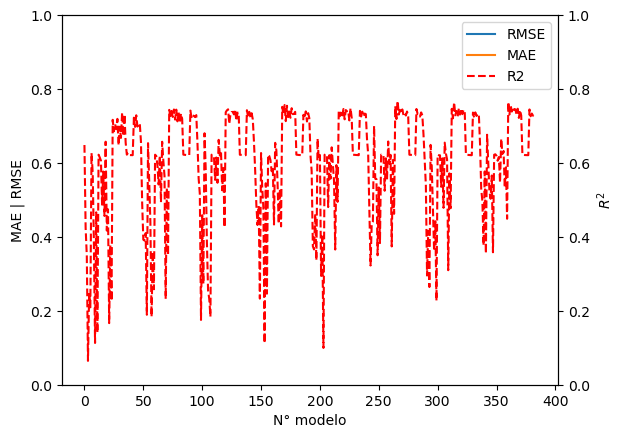

In [ ]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()

linha1 = ax1.plot(n_model, RMSE, '-',label = 'RMSE')
linha2 = ax1.plot(n_model, MAE, '-', label = 'MAE')
linha3 = ax2.plot(n_model, R2, '--', label = 'R2', color = 'red')

ax1.set_ylabel('MAE | RMSE')
ax2.set_ylabel('$R^2$')

ax2.set_ylim((0, 1))

ax1.set_xlabel('N° modelo')

lns = linha1 + linha2 + linha3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=0)

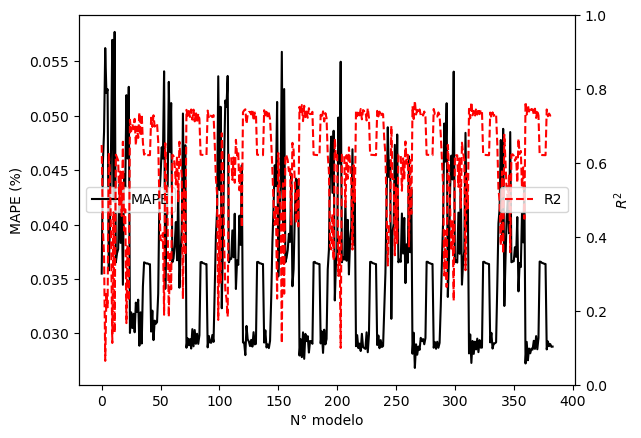

In [25]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


linha1 = ax1.plot(n_model, MAPE, label = 'MAPE', color = 'black')

linha2 = ax2.plot(n_model, R2, '--', label = 'R2', color = 'red')

ax1.set_ylabel('MAPE (%)')
ax2.set_ylabel('$R^2$')

ax2.set_ylim((0, 1))

ax1.set_xlabel('N° modelo')

ax1.legend(loc = 'center left')
ax2.legend(loc = 'center right')


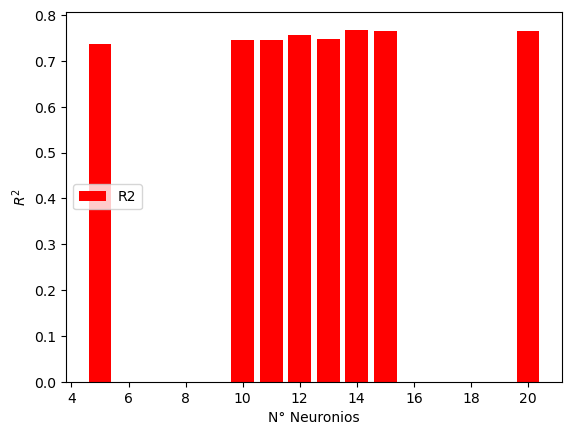

In [26]:


plt.bar(n_neuronios, R2, label = 'R2', color = 'red')

plt.ylabel('$R^2$')

ax2.set_ylim((0, 1))

plt.xlabel('N° Neuronios')

plt.legend(loc = 'center left')



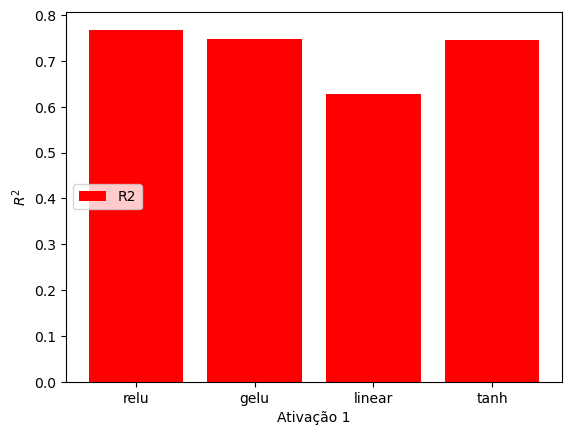

In [27]:


plt.bar(ativa1, R2, label = 'R2', color = 'red')
#plt.bar(ativa2, R2, label = 'R2', color = 'red')

plt.ylabel('$R^2$')

ax2.set_ylim((0, 1))

plt.xlabel('Ativação 1')

plt.legend(loc = 'center left')



Text(0, 0.5, 'MAPE')

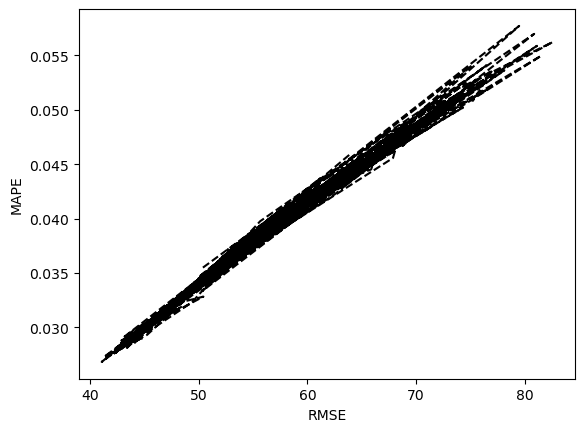

In [28]:


plt.plot(RMSE, MAPE, '--', label = 'R2', color = 'black')

plt.xlabel('RMSE')


plt.ylabel('MAPE')


Text(0, 0.5, 'MAPE')

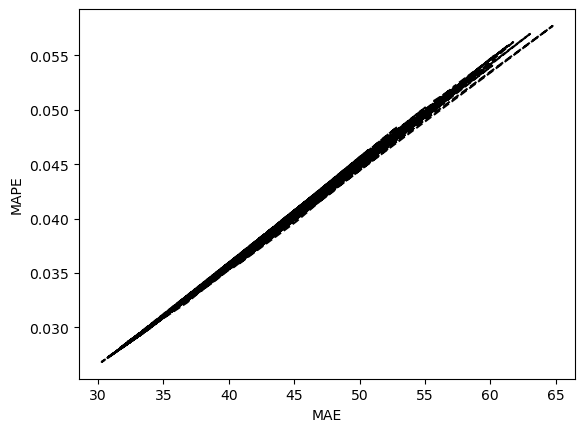

In [29]:

plt.plot(MAE, MAPE, '--', label = 'R2', color = 'black')

plt.xlabel('MAE')


plt.ylabel('MAPE')

Text(0, 0.5, 'RMSE')

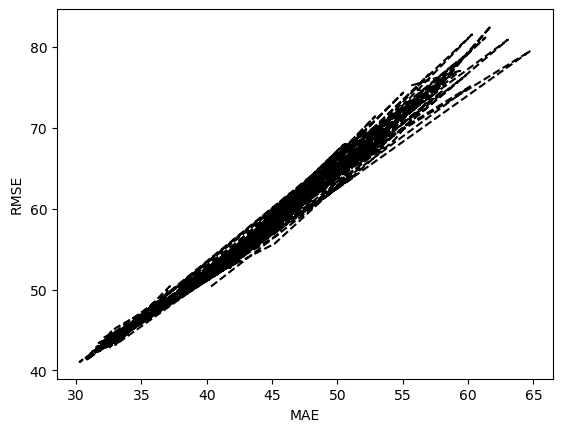

In [30]:


plt.plot(MAE, RMSE, '--', label = 'R2', color = 'black')

plt.xlabel('MAE')


plt.ylabel('RMSE')

Text(0, 0.5, 'Ativação 2')

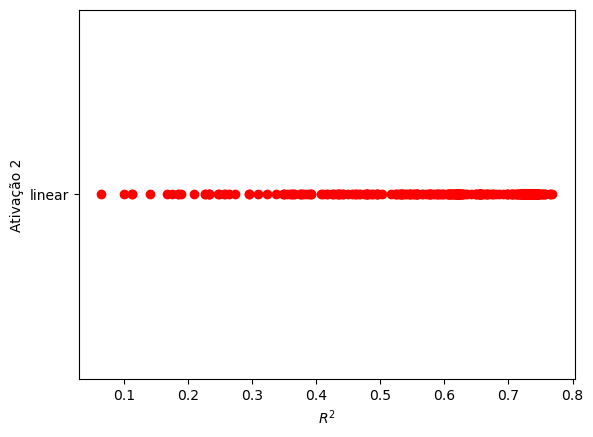

In [31]:


plt.scatter(R2, ativa2,  label = 'R2', color = 'red')

plt.xlabel('$R^2$')


plt.ylabel('Ativação 2')



Text(0, 0.5, 'Ativação 1')

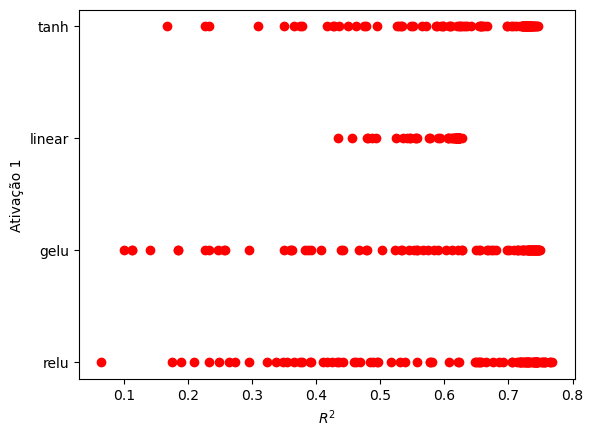

In [32]:


plt.scatter(R2, ativa1,  label = 'R2', color = 'red')

plt.xlabel('$R^2$')


plt.ylabel('Ativação 1')



Text(0, 0.5, 'Função perda')

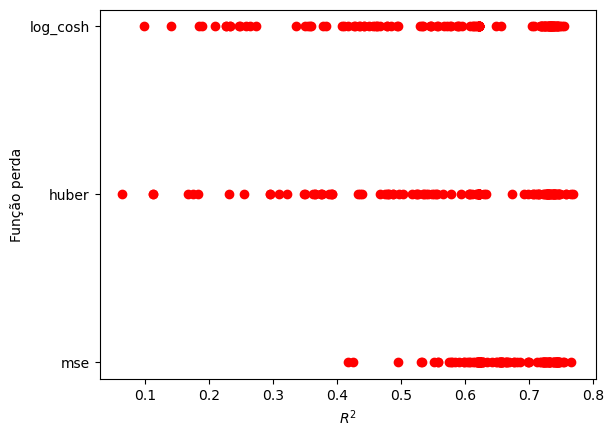

In [33]:


plt.scatter(R2, perda,  label = 'R2', color = 'red')

plt.xlabel('$R^2$')


plt.ylabel('Função perda')



Text(0, 0.5, 'N° Neurônios')

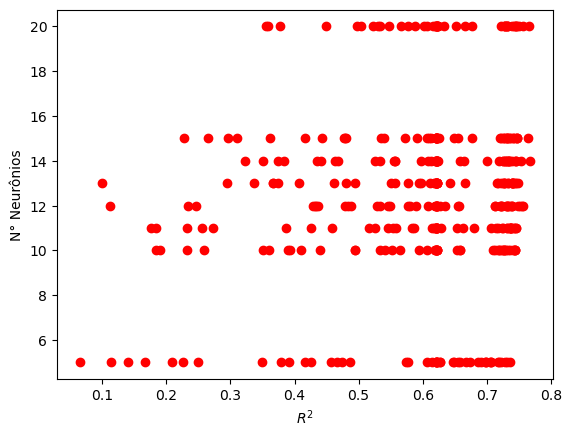

In [34]:

plt.scatter(R2, n_neuronios,  label = 'R2', color = 'red')

plt.xlabel('$R^2$')


plt.ylabel('N° Neurônios')



Text(0, 0.5, 'Batch Size')

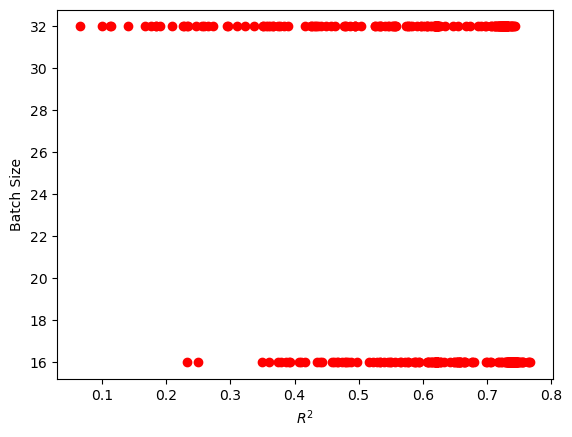

In [35]:


plt.scatter(R2, batch,  label = 'R2', color = 'red')

plt.xlabel('$R^2$')


plt.ylabel('Batch Size')



Text(0, 0.5, 'Camada de saída')

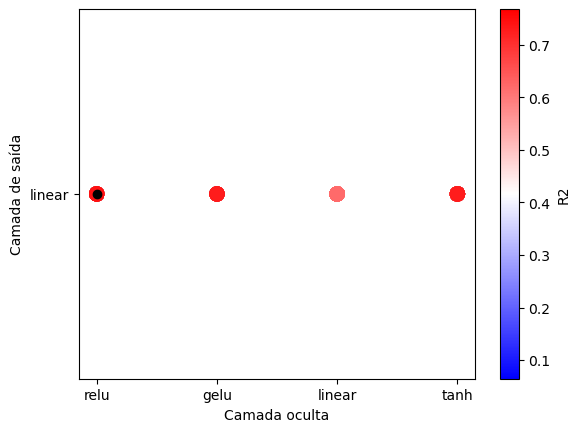

In [36]:
plt.scatter(ativa1, ativa2, c = R2, cmap = 'bwr', s = 100)

plt.plot(ativa1[R2.index(max(R2))], ativa2[R2.index(max(R2))], 'o', color = 'black')

plt.colorbar(label = 'R2')


plt.xlabel('Camada oculta')
plt.ylabel("Camada de saída")

Text(0, 0.5, 'N° de neurônios')

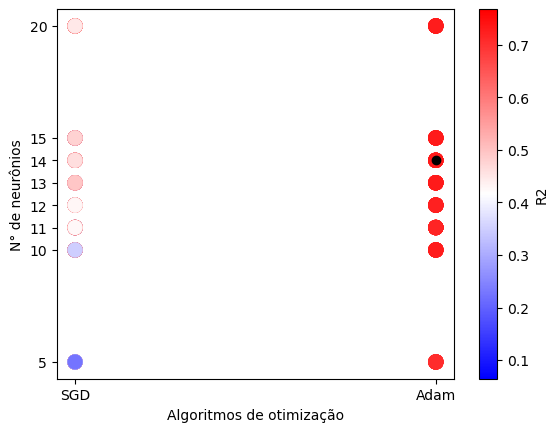

In [37]:
plt.scatter(otimizadores, n_neuronios, c = R2, cmap = 'bwr', s = 100)

plt.plot(otimizadores[R2.index(max(R2))], n_neuronios[R2.index(max(R2))], 'o', color = 'black')

plt.colorbar(label = 'R2')

plt.yticks(units)

plt.xlabel('Algoritmos de otimização')
plt.ylabel("N° de neurônios")

Text(0, 0.5, 'N° de neurônios')

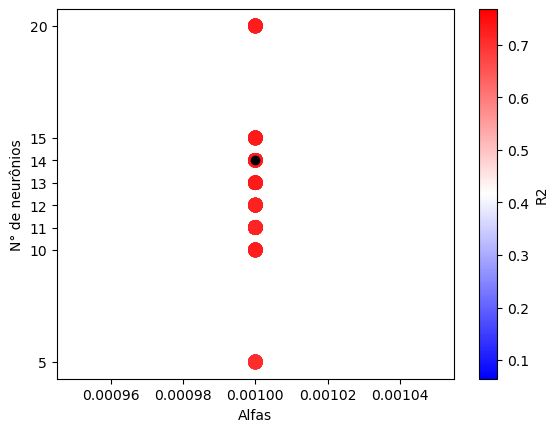

In [38]:
plt.scatter(alfas, n_neuronios, c = R2, cmap = 'bwr', s = 90)

plt.plot(alfas[R2.index(max(R2))], n_neuronios[R2.index(max(R2))], 'o', color = 'black')

plt.colorbar(label = 'R2')

plt.yticks(units)

plt.xlabel('Alfas')
plt.ylabel("N° de neurônios")

Text(0, 0.5, 'N° de neurônios')

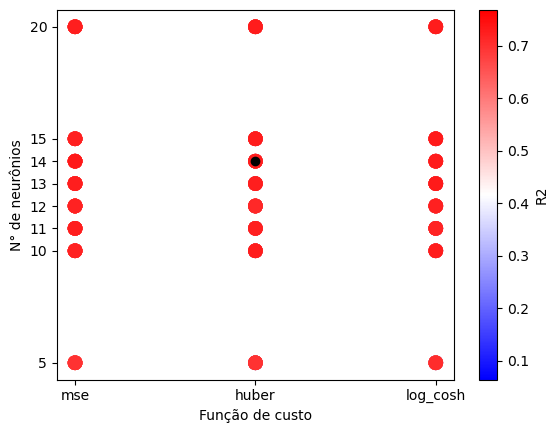

In [39]:
plt.scatter(perda, n_neuronios, c = R2, cmap = 'bwr', s = 90)

plt.plot(perda[R2.index(max(R2))], n_neuronios[R2.index(max(R2))], 'o', color = 'black', label = 'Maior R2')

plt.colorbar(label = 'R2')

plt.yticks(units)

plt.xlabel('Função de custo')
plt.ylabel("N° de neurônios")


## Selecionando os melhores para o Teste

In [41]:
# Seleciona 10 dos modelos analisados para a próxima etapa
qnt_teste = 20

resultado = pd.DataFrame({
    'N Modelo' : n_model,
    'R2' : R2,
    'RMSE' : RMSE,
    'MAE' : MAE,
    'MAPE' : MAPE,
    'N Neuronios' : n_neuronios,
    'Batch Size' : batch,
    'Taxa Aprend.' : alfas,
    'Otimizador' : otimizadores,
    'Funcao Custo' : perda,
    'Ativacao 1' : ativa1,
    'Ativacao 2': ativa2
})

resultado_teste = resultado.sort_values('R2', ascending= False).head(10)

resultado_teste

,N Modelo,R2,RMSE,MAE,MAPE,N Neuronios,Batch Size,Taxa Aprend.,Otimizador,Funcao Custo,Ativacao 1,Ativacao 2
266,266,0.768057,41.053498,30.274723,0.026828,14,16,0.001,Adam,huber,relu,linear
360,360,0.765092,41.331688,30.788744,0.027238,20,16,0.001,Adam,mse,relu,linear
314,314,0.764353,41.272069,30.771251,0.027287,15,16,0.001,Adam,huber,relu,linear
170,170,0.756727,42.179716,31.438664,0.027820,12,16,0.001,Adam,huber,relu,linear
362,362,0.756647,42.110957,31.119030,0.027533,20,16,0.001,Adam,huber,relu,linear
172,172,0.754722,42.340883,31.249712,0.027664,12,16,0.001,Adam,log_cosh,relu,linear
264,264,0.753500,42.409736,31.806968,0.028134,14,16,0.001,Adam,mse,relu,linear
168,168,0.751915,42.353381,31.612185,0.027968,12,16,0.001,Adam,mse,relu,linear
364,364,0.750520,42.599265,31.812046,0.028169,20,16,0.001,Adam,log_cosh,relu,linear
226,226,0.748393,42.716141,31.994792,0.028270,13,16,0.001,Adam,log_cosh,gelu,linear


In [63]:
resultado_teste.to_csv(f"Data_frame_{qnt_total}_modelos_ORD_EU4.csv")

# **Treinando os Melhores Modelos**

Escolha dos 3 melhores modelos para treinamento e validação no dataset

## Função

In [43]:
def model_melhores(unit, act1, act2, otimizador, perda, batch = 16,stop_patience = 100, epoch = 1000, val_split = 0.2, alfa = 0.001):
    

    # Definindo a arquitetura 
    best_model = tf.keras.Sequential()

    # Layer Input
    best_model.add(tf.keras.layers.Input(shape = (X_train.shape[1], ) ))

    # Layer oculta
    best_model.add(tf.keras.layers.Dense(units = unit, activation = act1))

    #best_model_1.add(tf.keras.layers.Dropout(0.05))

    # Layer saida
    best_model.add(tf.keras.layers.Dense(units = 1, activation = act2))

    # medidas MAPE, RMSE, MAE e R2
    metricas = ['root_mean_squared_error',
                'mean_absolute_error',
                'r2_score']

    # Definindo as métricas
    best_model.compile(
        optimizer = otimizador(learning_rate = alfa),
        loss = perda,
        metrics = metricas
    )

    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_loss', factor = 0.2, patience = 3, min_lr = 0.001)

    stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience = stop_patience)

    best_model.fit(X_train_scaled, Y_train_scaled, batch_size = batch, epochs = epoch, verbose = 0, 
                                   validation_split= val_split, callbacks=[stop, reduce_lr])


    return best_model

In [44]:
def RAPE(experimental, predito):
    # Modifica o formato do predito, para ficar somente como uma série de números (n,0)
    predito = predito.reshape(experimental.shape)
    
    exp_media = np.mean(experimental)

    dif_abs_exp = abs(experimental - exp_media)
    dif_abs_pred = abs(experimental - predito)

    rape = dif_abs_pred.sum() / dif_abs_exp.sum()

    return rape * 100



## Modelo 1


Configuração:

*  N° Neurônios: 14
*  Batch Size: 16
*  Otimizador: Adam
*  Função Custo: huber
*  Ativação 1: relu

*  R2 search grid: 0.768

In [45]:
# Criando o dataframe
model_best1 = model_melhores(14, 'relu', 'linear', perda = 'huber', otimizador = tf.keras.optimizers.Adam, batch = 14, stop_patience = 100, epoch = 5000)

best_df_hist1 = pd.DataFrame(model_best1.history.history)
best_df_hist1['epochs'] = model_best1.history.epoch


In [46]:
best_df_hist1.head()

,loss,mean_absolute_error,r2_score,root_mean_squared_error,val_loss,val_mean_absolute_error,val_r2_score,val_root_mean_squared_error,learning_rate,epochs
0,0.358736,0.716744,0.098078,0.910813,0.448828,0.804026,0.123810,1.059273,0.001,0
1,0.298686,0.641244,0.248315,0.831501,0.404921,0.750269,0.221972,0.998175,0.001,1
2,0.269808,0.601145,0.331208,0.784315,0.366342,0.703730,0.319413,0.933578,0.001,2
3,0.245357,0.568191,0.407123,0.738460,0.326254,0.658319,0.419316,0.862340,0.001,3
4,0.222603,0.539775,0.475991,0.694247,0.285486,0.612132,0.510691,0.791590,0.001,4


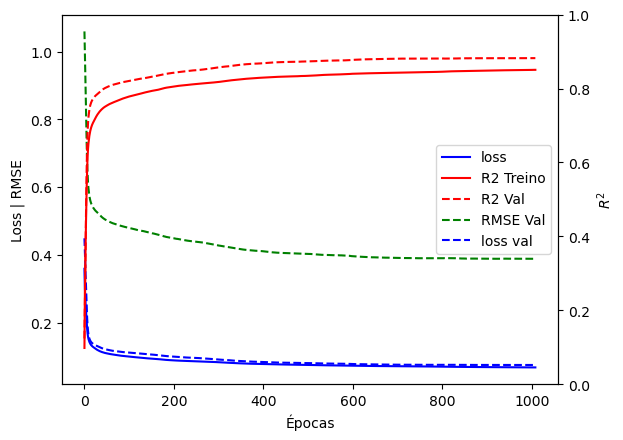

In [50]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


linha1 = ax1.plot(best_df_hist1['epochs'], best_df_hist1['loss'], label = "loss", color = 'blue')
linha5 = ax1.plot(best_df_hist1['epochs'], best_df_hist1['val_loss'], '--', label = "loss val", color = 'blue')

linha2 = ax2.plot(best_df_hist1['epochs'], best_df_hist1['r2_score'], label = "R2 Treino", color = 'red')
linha3 = ax2.plot(best_df_hist1['epochs'], best_df_hist1['val_r2_score'], '--', label = "R2 Val", color = 'red')

linha4 = ax1.plot(best_df_hist1['epochs'], best_df_hist1['val_root_mean_squared_error'], '--', label = "RMSE Val", color = 'green')

ax1.set_ylabel('Loss | RMSE')
ax2.set_ylabel('$R^2$')

ax2.set_ylim((0, 1))

ax1.set_xlabel('Épocas')


lns = linha1 + linha2 + linha3 + linha4 + linha5
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= 'center right')

In [51]:
predito_y_best_1_scaled = model_best1.predict(X_test_scaled, verbose = 0)
predito_y_best_1 = Y_Retorno(predito_y_best_1_scaled)

# Calculo das metricas
mae_best_1 = mean_absolute_error(Y_test, predito_y_best_1)
# O MAPE é diferente, para evitar o erro de numeros pequenos, precisa converter para a escala normal
mape_best_1 = mean_absolute_percentage_error(Y_test, predito_y_best_1)
rape_best_1 = RAPE(Y_test, predito_y_best_1)
rmse_best_1 = root_mean_squared_error(Y_test, predito_y_best_1)
r2_best_1 = r2_score(Y_test, predito_y_best_1)

print("Para o modelo 1, no set de validação o modelo obteve:")
print(f"MAE = {mae_best_1:.3f}")
print(f"MAPE = {mape_best_1 * 100:.3f}%")
print(f"RAPE = {rape_best_1:.3f}%")
print(f"RMSE = {rmse_best_1:.3f}")
print(f"R2 = {r2_best_1:.3f}")

Para o modelo 1, no set de validação o modelo obteve:
MAE = 27.579
MAPE = 2.427%
RAPE = 36.854%
RMSE = 38.310
R2 = 0.827


In [52]:
df_final = df.loc[Y_test.index][:]

#df_final = pd.DataFrame(list(Y_test), columns= ['Experimental'], index= Y_test.index)

df_final['Calculado Model 1'] = predito_y_best_1

df_final.head()

,HBA,HBD,HBA:HBD,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3),Calculado Model 1
1087,Tetrabutylammonium chloride,Glutamic acid,8;1,323.15,789.04,14.610,0.8895,952.2,959.528687
692,Choline chloride,O-Cresol,1;2,298.20,668.78,39.940,0.5690,1077.6,1118.078369
1195,Tetraethylammonium bromide,Levulinic acid,1;1,343.15,687.77,28.859,0.6275,1139.7,1143.751343
122,Allyl triphenylphosphonium bromide,Diethylene glycol,1;4,303.15,756.24,30.004,0.9700,1193.8,1213.685547
445,Choline chloride,D-Xylose,3;1,296.15,682.12,27.934,1.0381,1220.0,1042.269287


## Modelo 2

Configuração:

*  N° Neurônios: 20
*  Batch Size: 16
*  Otimizador: Adam
*  Função Custo: mse
*  Ativação 1: relu

*  R2 search grid: 0.7650

In [53]:
# Criando o dataframe
model_best2 = model_melhores(20, 'relu', 'linear', perda = 'mse', otimizador = tf.keras.optimizers.Adam, batch = 16, stop_patience = 100, epoch = 1000)

best_df_hist2 = pd.DataFrame(model_best2.history.history)
best_df_hist2['epochs'] = model_best2.history.epoch


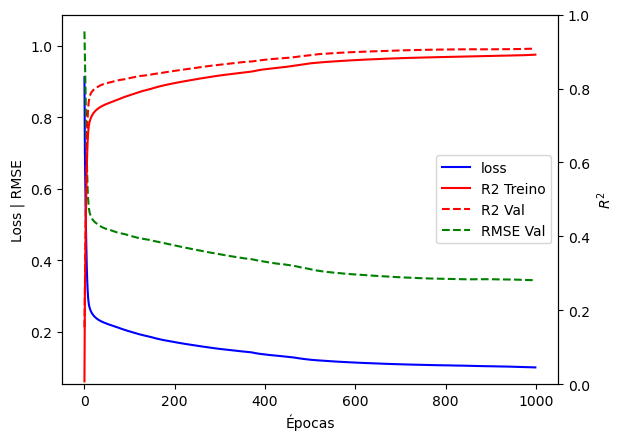

In [55]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


linha1 = ax1.plot(best_df_hist2['epochs'], best_df_hist2['loss'], label = "loss", color = 'blue')

linha2 = ax2.plot(best_df_hist2['epochs'], best_df_hist2['r2_score'], label = "R2 Treino", color = 'red')
linha3 = ax2.plot(best_df_hist2['epochs'], best_df_hist2['val_r2_score'], '--', label = "R2 Val", color = 'red')

linha4 = ax1.plot(best_df_hist2['epochs'], best_df_hist2['val_root_mean_squared_error'], '--', label = "RMSE Val", color = 'green')

ax1.set_ylabel('Loss | RMSE')
ax2.set_ylabel('$R^2$')

ax2.set_ylim((0, 1))

ax1.set_xlabel('Épocas')


lns = linha1 + linha2 + linha3 + linha4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= 'center right')

In [56]:
predito_y_best_2_scaled = model_best2.predict(X_test_scaled, verbose = 0)
predito_y_best_2 = Y_Retorno(predito_y_best_2_scaled)

# Calculo das metricas
mae_best_2 = mean_absolute_error(Y_test, predito_y_best_2)
# O MAPE é diferente, para evitar o erro de numeros pequenos, precisa converter para a escala normal
mape_best_2 = mean_absolute_percentage_error(Y_test, predito_y_best_2)
rape_best_2 = RAPE(Y_test, predito_y_best_2)
rmse_best_2 = root_mean_squared_error(Y_test, predito_y_best_2)
r2_best_2 = r2_score(Y_test, predito_y_best_2)

print("Para o modelo 2, no set de validação o modelo obteve:")
print(f"MAE = {mae_best_2:.3f}")
print(f"MAPE = {mape_best_2 * 100:.3f}%")
print(f"RAPE = {rape_best_2:.3f}%")
print(f"RMSE = {rmse_best_2:.3f}")
print(f"R2 = {r2_best_2:.3f}")

Para o modelo 2, no set de validação o modelo obteve:
MAE = 23.635
MAPE = 2.076%
RAPE = 31.584%
RMSE = 32.443
R2 = 0.876


In [57]:
df_final['Calculado Model 2'] = predito_y_best_2

df_final.head()

,HBA,HBD,HBA:HBD,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3),Calculado Model 1,Calculado Model 2
1087,Tetrabutylammonium chloride,Glutamic acid,8;1,323.15,789.04,14.610,0.8895,952.2,959.528687,978.267334
692,Choline chloride,O-Cresol,1;2,298.20,668.78,39.940,0.5690,1077.6,1118.078369,1125.464600
1195,Tetraethylammonium bromide,Levulinic acid,1;1,343.15,687.77,28.859,0.6275,1139.7,1143.751343,1128.049805
122,Allyl triphenylphosphonium bromide,Diethylene glycol,1;4,303.15,756.24,30.004,0.9700,1193.8,1213.685547,1215.788574
445,Choline chloride,D-Xylose,3;1,296.15,682.12,27.934,1.0381,1220.0,1042.269287,1067.940796


## Modelo 3

Configuração:

*  N° Neurônios: 15
*  Batch Size: 16
*  Otimizador: Adam
*  Função Custo: ruber
*  Ativação 1: relu

*  R2 search grid: 0.764353

In [58]:
# Criando o dataframe
model_best3 = model_melhores(15, 'relu', 'linear', perda = 'huber', otimizador = tf.keras.optimizers.Adam, batch = 16, stop_patience = 100, epoch = 1000)

best_df_hist3 = pd.DataFrame(model_best3.history.history)
best_df_hist3['epochs'] = model_best3.history.epoch


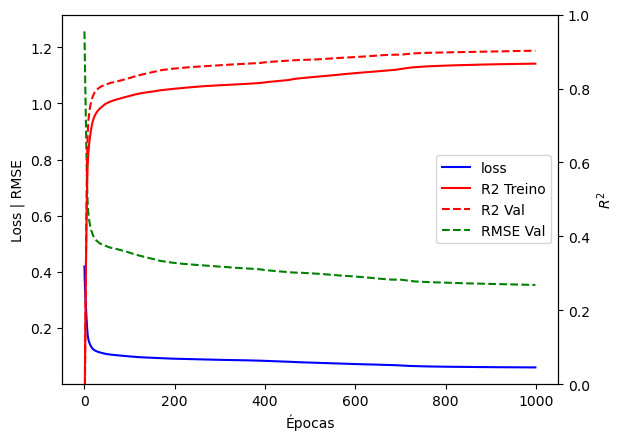

In [59]:
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()


linha1 = ax1.plot(best_df_hist3['epochs'], best_df_hist3['loss'], label = "loss", color = 'blue')

linha2 = ax2.plot(best_df_hist3['epochs'], best_df_hist3['r2_score'], label = "R2 Treino", color = 'red')
linha3 = ax2.plot(best_df_hist3['epochs'], best_df_hist3['val_r2_score'], '--', label = "R2 Val", color = 'red')

linha4 = ax1.plot(best_df_hist3['epochs'], best_df_hist3['val_root_mean_squared_error'], '--', label = "RMSE Val", color = 'green')

ax1.set_ylabel('Loss | RMSE')
ax2.set_ylabel('$R^2$')

ax2.set_ylim((0, 1))

ax1.set_xlabel('Épocas')


lns = linha1 + linha2 + linha3 + linha4
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc= 'center right')

In [60]:
predito_y_best_3_scaled = model_best3.predict(X_test_scaled, verbose = 0)
predito_y_best_3 = Y_Retorno(predito_y_best_3_scaled)

# Calculo das metricas
mae_best_3 = mean_absolute_error(Y_test, predito_y_best_3)
mape_best_3 = mean_absolute_percentage_error(Y_test, predito_y_best_3)
rape_best_3 = RAPE(Y_test, predito_y_best_3)
rmse_best_3 = root_mean_squared_error(Y_test, predito_y_best_3)
r2_best_3 = r2_score(Y_test, predito_y_best_3)

print("Para o modelo 3, no set de validação o modelo obteve:")
print(f"MAE = {mae_best_3:.3f}")
print(f"MAPE = {mape_best_3 * 100:.3f}%")
print(f"RAPE = {rape_best_3:.3f}%")
print(f"RMSE = {rmse_best_3:.3f}")
print(f"R2 = {r2_best_3:.3f}")

Para o modelo 3, no set de validação o modelo obteve:
MAE = 26.773
MAPE = 2.339%
RAPE = 35.778%
RMSE = 36.966
R2 = 0.839


In [61]:
df_final['Calculado Model 3'] = predito_y_best_3
df_final.head()

,HBA,HBD,HBA:HBD,T(K),Tc(K),Pc(bar),Fator Acentrico,Density(kg/m3),Calculado Model 1,Calculado Model 2,Calculado Model 3
1087,Tetrabutylammonium chloride,Glutamic acid,8;1,323.15,789.04,14.610,0.8895,952.2,959.528687,978.267334,979.971924
692,Choline chloride,O-Cresol,1;2,298.20,668.78,39.940,0.5690,1077.6,1118.078369,1125.464600,1125.336426
1195,Tetraethylammonium bromide,Levulinic acid,1;1,343.15,687.77,28.859,0.6275,1139.7,1143.751343,1128.049805,1139.391113
122,Allyl triphenylphosphonium bromide,Diethylene glycol,1;4,303.15,756.24,30.004,0.9700,1193.8,1213.685547,1215.788574,1202.095581
445,Choline chloride,D-Xylose,3;1,296.15,682.12,27.934,1.0381,1220.0,1042.269287,1067.940796,1075.525024


In [62]:
df_final.to_csv(f"Melhores_resultados_modelos_EU4.csv")

In [ ]:
print(f"\n############# MODELO 1 ###############")
for hba in df_final['HBA'].unique():
    
    index = df_final['HBA'][df_final['HBA'] == hba].index
    
    df_hba = df_final.loc[index]

    r2_score_hba = r2_score(df_hba['Density(kg/m3)'], df_hba[f'Calculado Model 1'])
    rmse_score_hba = root_mean_squared_error(df_hba['Density(kg/m3)'], df_hba[f'Calculado Model 1'])
    mape_score_hba = mean_absolute_percentage_error(df_hba['Density(kg/m3)'], df_hba[f'Calculado Model 1'])

    print(f"HBA {hba}, com {len(df_hba)} amostras, obteve...")

    print(f"\t\tR2 = {r2_score_hba:.3f}")
    print(f"\t\tRMSE = {rmse_score_hba:.3f}")
    print(f"\t\tMAPE = {mape_score_hba*100:.3f}%")

# **Conclusão**



# **Referências**

1. Abdollahzadeh, M., Khosravi, M., Hajipour Khire Masjidi, B. et al. Estimating the density of deep eutectic solvents applying supervised machine learning techniques. Sci Rep 12, 4954 (2022). https://doi.org/10.1038/s41598-022-08842-5